# Data Mining and Big Data Analytics 
### Instructor: Márton Karsai, Associate Professor

## Assignment 1

## Problem description:

You will find the file **loan_data.csv** in the assignment folder. This datasets contains the data of applicants who previously applied for a Property Loan.

    The columns represent the following properties:

1. Loan_ID: A unique loan ID.
2. Gender: Either male or female.
3. Married: Weather Married(yes) or Not Marttied(No).
4. Dependents: Number of persons depending on the client.
5. Education: Applicant Education(Graduate or Undergraduate).
6. Self_Employed: Self-employed (Yes/No).
7. ApplicantIncome: Applicant income.
8. CoapplicantIncome: Co-applicant income.
9. LoanAmount: Loan amount in thousands.
10. Loan_Amount_Term: Terms of the loan in months.
11. Credit_History: Credit history meets guidelines.
12. Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
13. Loan_Status: Loan approved (Y/N).

The last column (Loan_Status) contains the information about whether the loan is approved or not.  The goal is to classify whether an individual can get the loan amount based on its Income, Education, Working Experience, Loan taken previously, and some other features.


1. **Exploration and Pre-processing**. Explore the data: use the approaches presented during the class to discuss the distribution of the typical parameters in each class. Which are more and less diverse? Rank the features based on their relative variance (variance divided by the mean of the set) of their distribution. Study the correlations between features. Which are the most correlated? The goal of this part is to explore the features space to identify potential issues and instruct the pre-processing phase, e.g., normalization, missing values, feature engeneering. Implement the necessary changes.

2. **Train a Decision Tree Classifier and Evaluate its Performance**. Build the DecisionTreeClassifier with arbitrary depth, split the data into training and test sets, and measure the accuracy of the model on both (note: one measurement is no measurement, so make sure you repeat the randomization multiple times). Use alternative metrics that give you a better idea of the model performance. Try different ratios regarding the size of the training and the test sets and see how the accuriacies change. How does this change varies for different depth values? Can you observe the occurrance of under/overfitting? Is that consistent with your theoretical expectations? 

3. **Additionally, train a k-NN and NBC and Evaluate their Performances**. Solve the classification problem with 3-NN and evaluate it with 5-fold cross-validation. Compare the performance of the k-NN classifier with the DecisionTree. Also build Naive Bayes Classifier and evaluate it with 5-fold cross-validation. Compare the performance of the NBC with the DecisionTree and k-NN.

4. **Optimise all three algorithms**. Output the accuracy of the three classifiers with the best value of the hyperparameters, also with implementing different scaling techniques. Comment your solution and the performance beyond accuracy. 

5. **Choose your Fighter**. Which model would you pick to solve the problem in a business context?     

# Solution 1

## Data preparation

In [1]:
import pandas as pd 

loan_df = pd.read_csv("loan_data.csv", sep=";")
loan_df.shape

C:\Users\hanic\AppData\Local\Temp\ipykernel_12432\4277310.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


(381, 13)

In [2]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0.0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3.0,Graduate,No,5703.0,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0.0,Graduate,No,3232.0,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0.0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3.0,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y


Prepare the data
    
* y: labels
* X: features space 

In [3]:
y = loan_df['Loan_Status'].values
X = loan_df.iloc[:, 1:-1].values

In [4]:
features_names = loan_df.columns.values[1:-1]
features_names

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype=object)

Let's first write functions that we'll use on all (or at least some) attributes, so we less redundant code.

In [5]:
import matplotlib.pyplot as plt

def plot_for_all_attributes_6x2(df, plotting_function): #12 attributes (+id), best to plot 6x2

    fig, axes = plt.subplots(6, 2, figsize=(10, 20))

    for i in range(len(df.columns)):
        attribute = df.columns[i]
        plotting_function(df, attribute, axes[i//2, i%2]) #floor(n/2)th row, if n is even then in the first (0) column, if n is odd then in the second (1) column

    fig.suptitle(f'{plotting_function.__name__} for all attributes ({len(df)} rows)', fontsize=18, y = 1.01) #Function's name is in the title, y value by trial and error
    plt.tight_layout()
    plt.show()

def plot_quantity(df, feature, ax=None): #Ax = None is for cases when we just want to plot this graph and nothing else
    if ax is None:
        ax = plt.gca() #Didn't want to run a method in the input list, so I put None there and change it here

    missing_values = df[feature].isnull().sum()
    if df[feature].dtype == 'object': #Categorical variable. Could have also just done if it is not float
        df[feature].value_counts().plot(kind='bar',ax=ax)
        ax.set_title(feature+" (values per categories), missing: "+str(missing_values))
    else:
        df[feature].plot(kind='hist', ax=ax, bins=len(df[feature].unique())) #New bin for each different value
        ax.set_title(feature+" (distribution), missing: "+str(missing_values))
    ax.set_aspect('auto') #Better layout
    ax.grid(False)


def normalize_df(df):
    df2 = df.copy() #Without this, we get warnings
    for column in df.columns:
        if df[column].dtype != 'object': #Again, if it is not categorical
            df2[column] = (df[column] - df[column].mean()) / df[column].std() #Standardization, I prefer min-max but here it may be a better choice
    return df2

def denormalize_df(df, original_df): #Original df is for the mean and std. We don't want leakage
    df2 = df.copy()
    for column in df.columns:
        if df[column].dtype != 'object':
            df2[column] = df[column] * original_df[column].std() + original_df[column].mean() #Undoing the standardization, inverse equation
    return df2


### Exploration

Let's see if there are any missing values, and if, how many in each column:

In [6]:
import numpy as np

print("Missing values")
for column in loan_df.columns:
    print(column + ": " + str(np.sum([loan_df[column].isna()])))

Missing values
Loan_ID: 0
Gender: 5
Married: 0
Dependents: 11
Education: 0
Self_Employed: 21
ApplicantIncome: 2
CoapplicantIncome: 0
LoanAmount: 0
Loan_Amount_Term: 11
Credit_History: 30
Property_Area: 0
Loan_Status: 0


These need to be handled.

Before we do anything, check the distributions:

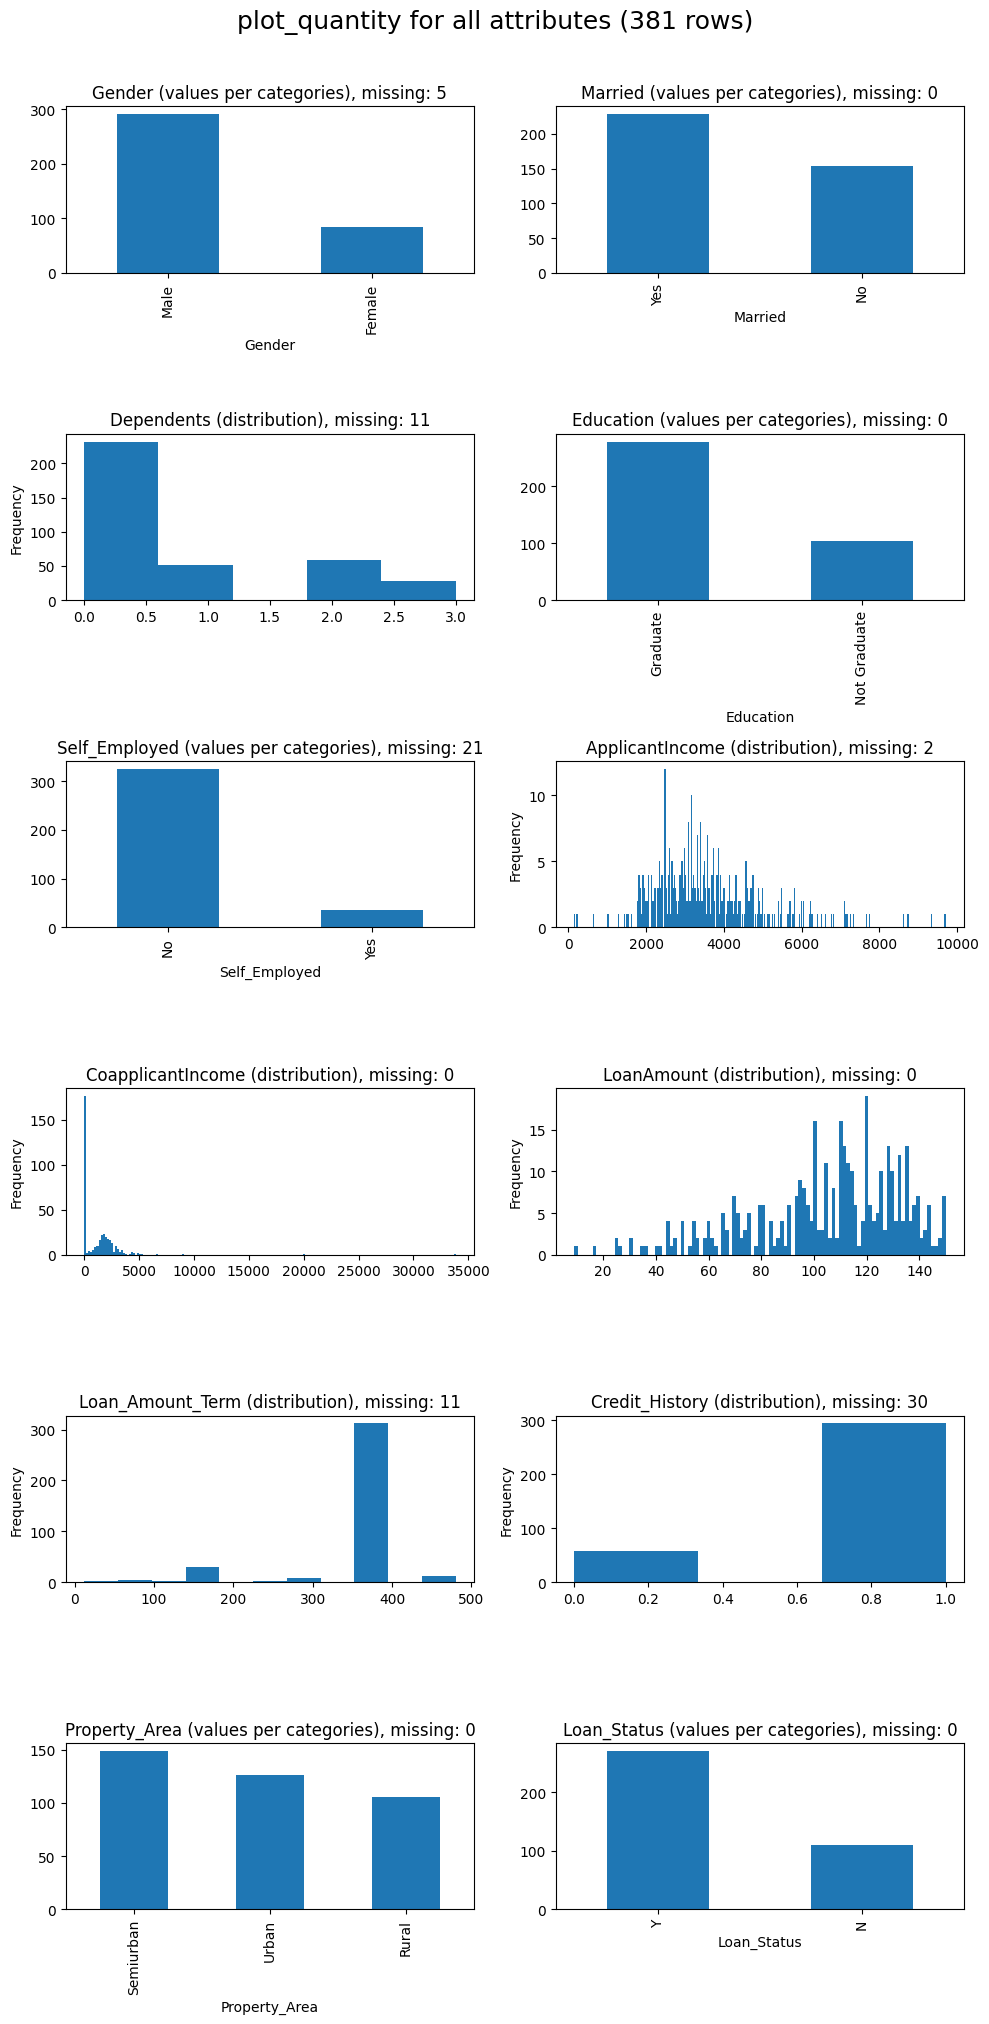

In [7]:
plot_for_all_attributes_6x2(loan_df.drop(columns=['Loan_ID']), plot_quantity)

Not the best plot for some numerical data (dependency should be e.g. ints and rather a bar chart, etc.), also not nice, but it helps to see how to continue. We'll make nicer plots later.

### Feature engineering

Firstly, drop the obvious outliers (one around 35000, one around 15000)

In [8]:
loan_df = loan_df[loan_df['CoapplicantIncome']<20000] #This instance is the reason x-axis is so long in CoapplicantIncome graph

I had the idea said in class one time: use regression to fill in NaNs. However, this mostly works for continuous data, and we only have 2 continuous missing values (both from ApplicantIncome). I'll just drop them, the two rows should not matter much even if we have less than 400 instances.

In [9]:
loan_df =loan_df[~loan_df['ApplicantIncome'].isna()]

There's one problem I faced later while writing a k-NN to complete NaN values: if while completion, we have another NaN in the same row, we have trouble predicting that row. There are only 2 rows with multiple NaNs, so I'll just drop them too.

In [10]:
#Instances with at least 2 missing values
missing_values = loan_df.isna().sum(axis=1)

loan_df = loan_df[missing_values<2].reset_index(drop=True)

Let's make the data numerical. We can turn binary data into 0 and 1, renaming it to "Is...". The only non-binary data is Property_Area, which we can turn into 3 columns, 0 and 2 being rural and urban (There is a bigger difference between rural and urban than semiurban and any of the two, that is why).<br>
Variance is more meaningful this way

In [11]:
def switch_values(value): #We'll use this for the input to the .apply() method
    if value in ['Male', 'Yes', 'Y', 'Graduate']:
        return 1
    elif value in ['Female', 'No', 'N', 'Not Graduate']:
        return 0
    else:
        return np.nan #Should be nans in the first place, but just in case


df_numerical = loan_df.copy()

values_dict = {'Rural': 0, 'Semiurban': 1, 'Urban': 2} #See the MD comment above
df_numerical['Property_Area'] = loan_df['Property_Area'].map(values_dict)
df_numerical['Gender'] = loan_df['Gender'].apply(switch_values)
df_numerical['Married'] = loan_df['Married'].apply(switch_values)
df_numerical['Education'] = loan_df['Education'].apply(switch_values)
df_numerical['Self_Employed'] = loan_df['Self_Employed'].apply(switch_values)
df_numerical['Loan_Status'] = loan_df['Loan_Status'].apply(switch_values)
df_numerical.rename(columns={'Gender': 'IsMale', 'Married':'IsMarried', 'Education':'IsGraduate', 'Self_Employed':'IsSelfEmployed', 'Loan_Status':'Loan_Granted'}, inplace=True)
df_numerical


,Loan_ID,IsMale,IsMarried,Dependents,IsGraduate,IsSelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Granted
0,LP001003,1.0,1,1.0,1,0.0,4583.0,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1.0,1,0.0,1,1.0,3000.0,0.0,66.0,360.0,1.0,2,1
2,LP001006,1.0,1,0.0,0,0.0,2583.0,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1.0,0,0.0,1,0.0,6000.0,0.0,141.0,360.0,1.0,2,1
4,LP001013,1.0,1,0.0,0,0.0,2333.0,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,LP002953,1.0,1,3.0,1,0.0,5703.0,0.0,128.0,360.0,1.0,2,1
371,LP002974,1.0,1,0.0,1,0.0,3232.0,1950.0,108.0,360.0,1.0,0,1
372,LP002978,0.0,0,0.0,1,0.0,2900.0,0.0,71.0,360.0,1.0,0,1
373,LP002979,1.0,1,3.0,1,0.0,4106.0,0.0,40.0,180.0,1.0,0,1


For all other data, we'll use k-NN to fill in the missing values.

However, k-NN is distance-based, so we need to normalize the data first. I used standardization, probably it is better in this case when binary classes are so inbalanced.

In [12]:
df_normalized = normalize_df(df_numerical)
df_normalized

,Loan_ID,IsMale,IsMarried,Dependents,IsGraduate,IsSelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Granted
0,LP001003,0.541214,0.815407,0.315603,0.606325,-0.324490,0.704090,0.285640,0.807537,0.280781,0.444233,-1.345544,-1.570232
1,LP001005,0.541214,0.815407,-0.686094,0.606325,3.073107,-0.411630,-0.862523,-1.369807,0.280781,0.444233,1.215770,0.635150
2,LP001006,0.541214,0.815407,-0.686094,-1.644882,-0.324490,-0.705537,0.932815,0.526590,0.280781,0.444233,1.215770,0.635150
3,LP001008,0.541214,-1.223111,-0.686094,0.606325,-0.324490,1.702810,-0.862523,1.264077,0.280781,0.444233,1.215770,0.635150
4,LP001013,0.541214,0.815407,-0.686094,-1.644882,-0.324490,-0.881740,0.291731,-0.351372,0.280781,0.444233,1.215770,0.635150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,LP002953,0.541214,0.815407,2.318999,0.606325,-0.324490,1.493481,-0.862523,0.807537,0.280781,0.444233,1.215770,0.635150
371,LP002974,0.541214,0.815407,-0.686094,0.606325,-0.324490,-0.248113,0.622171,0.105168,0.280781,0.444233,-1.345544,0.635150
372,LP002978,-1.842704,-1.223111,-0.686094,0.606325,-0.324490,-0.482111,-0.862523,-1.194215,0.280781,0.444233,-1.345544,0.635150
373,LP002979,0.541214,0.815407,2.318999,0.606325,-0.324490,0.367894,-0.862523,-2.282887,-2.331912,0.444233,-1.345544,0.635150


Let's complete the data with k-NN. Here, we don't have to worry about multiple missing NaNs, because we removed rows with multiple missing values earlier.



In [13]:
#Let's see which columns have missing values

print("Columns with missing values")
for column in df_normalized.columns:
    missing_values_sum = np.sum(df_normalized[column].isna())
    if missing_values_sum > 0:
        print(column + ": " + str(missing_values_sum))

Columns with missing values
IsMale: 5
Dependents: 10
IsSelfEmployed: 19
Loan_Amount_Term: 9
Credit_History: 30


In [14]:
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.preprocessing import LabelEncoder #Similar to one hot encoding, I found it while looking for a way to fill NaNs in categorical columns 

def fill_missing_values_knn(df, feature, k=1): #Pick the closest neighbour, k=1
    df2 = df.copy() #Not have copy warnings
    train = df2[df2[feature].notna()].dropna() #Rows where 'IsSelfEmployed' is not NaN and no other column is NaN
    test = df2[df2[feature].isna()]
    non_train_test = df2.drop(train.index) 

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train.drop(columns=[feature]), train[feature])
    test[feature] = knn.predict(test.drop(columns=[feature]))
    #Replace the NaNs with the predicted values
    for index in test.index:
        df2.at[index, feature] = test.at[index, feature]
    return df2

df_completed = df_normalized.drop(columns=['Loan_ID']).copy()
for column in ['IsMale', 'Dependents', 'IsSelfEmployed', 'Loan_Amount_Term', 'Credit_History']:
    df_completed = fill_missing_values_knn(df_completed, column)
df_completed['Loan_ID'] = df_normalized['Loan_ID']
df_completed.isna().sum()

C:\Users\hanic\AppData\Local\Temp\ipykernel_12432\2014519218.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[feature] = knn.predict(test.drop(columns=[feature]))
C:\Users\hanic\AppData\Local\Temp\ipykernel_12432\2014519218.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[feature] = knn.predict(test.drop(columns=[feature]))
C:\Users\hanic\AppData\Local\Temp\ipykernel_12432\2014519218.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

IsMale               0
IsMarried            0
Dependents           0
IsGraduate           0
IsSelfEmployed       0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Granted         0
Loan_ID              0
dtype: int64

Now transform back the data ("denormalize"):

In [15]:
df = denormalize_df(df_completed, df_numerical)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1] #Loan_ID got moved to the end, we fix that
df = df[cols] 
df

,Loan_ID,IsMale,IsMarried,Dependents,IsGraduate,IsSelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Granted
0,LP001003,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
1,LP001005,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
2,LP001006,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
3,LP001008,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
4,LP001013,1.0,1.0,0.0,0.0,0.0,2333.0,1516.0,95.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,LP002953,1.0,1.0,3.0,1.0,0.0,5703.0,0.0,128.0,360.0,1.0,2.0,1.0
371,LP002974,1.0,1.0,0.0,1.0,0.0,3232.0,1950.0,108.0,360.0,1.0,0.0,1.0
372,LP002978,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1.0
373,LP002979,1.0,1.0,3.0,1.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1.0


Super, now we have a complete, clean dataset.<br>
One could probably rename *Loan_Amount_Term* to *Loan_Term*, but I'll leave it as it is.

## Statistics

### Variance:

In [16]:
#Relative variance of the attributes
print("Relative variance of the attributes")

for column in df.columns[1:]:
    print(column + ": " + str(df[column].std() / df[column].mean()))


Relative variance of the attributes
IsMale: 0.537988486349804
IsMarried: 0.8175874252096583
Dependents: 1.4583304497836314
IsGraduate: 0.607946326013763
IsSelfEmployed: 3.026476603271358
ApplicantIncome: 0.3958719233013465
CoapplicantIncome: 1.159388776492962
LoanAmount: 0.2711772411746743
Loan_Amount_Term: 0.20145571878356716
Credit_History: 0.4283159017778635
Property_Area: 0.7431940459274264
Loan_Granted: 0.6368484260821243


As I see it, it doesn't really make sense to compare variance for binary data at least, if it is not normalized then more "No" (0) data will bring down the mean, bring up variance. But with normalization, the mean is 0, so we get near infinite variance. I'll just ignore binary data for this.

Plot the others:

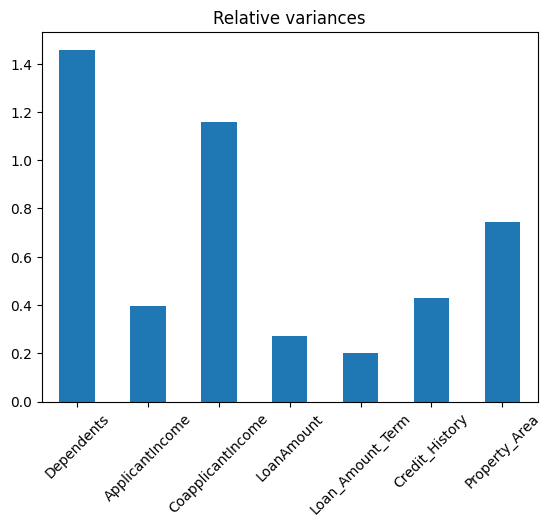

In [17]:
non_binary_columns = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']
(df[non_binary_columns].std() / df[non_binary_columns].mean()).plot(kind='bar', title='Relative variances');
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

Dependents is hard to judge, as it is a categorical variable between 0 and 3, it has high variance from the fact that it has a lot of 0 values (making the mean low).<br>
What's interesting is that how high the difference is in variance for Applicant Income and Coapplicant Income. When we'll plot their distributions (again), we'll see why that is. Loan amount or term attributes have the lowest variance, these make sense as they are more "standardized".

### Correlations

Let's firstly plot the correlations between continuous data (categoricals are very "lines-like", so don't think it's worth it to plot them):

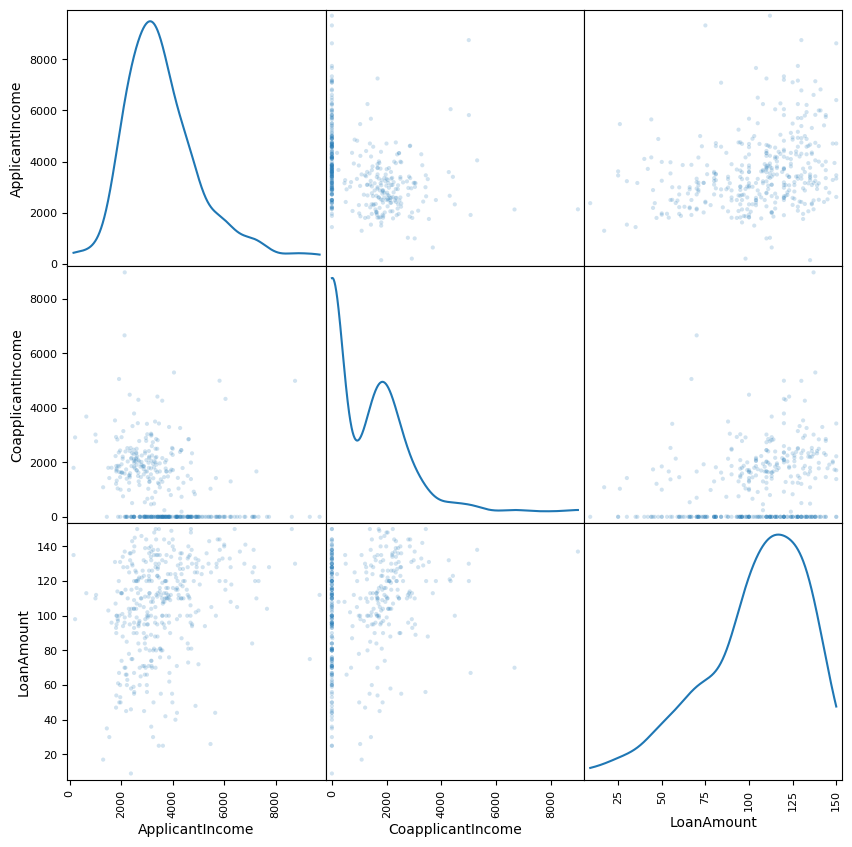

In [19]:
from pandas.plotting import scatter_matrix

categorical_columns = ['IsMale', 'IsMarried', 'Dependents','IsGraduate', 'IsSelfEmployed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Granted', ]
numerical_columns = [ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' ]

scatter_matrix(df[numerical_columns], alpha = 0.2, figsize = (10, 10), diagonal = 'kde');

This plot already tells a lot.

Firstly, we found that coapplicant income is very high, because a lot of values are 0 (unlike for applicant income, where there are almost none), but the maximum values are comparable. Secondly, hard to notice first but there is some positive correlation between the loan amount and applicant income (notice the "triangle", the higher the applicant income is, the more it shrinks on the bottom, making the average loan amount growing as applicant income grows), similarly to loan amount and coapplicant income. This means that the more income the applicant has, the bigger loan they aim to get.<br>
As for the correlation between coapplicant and applicant income, we see that aside from the big line of coapplicant income 0s, there are not really any lines, more like a cloud. We know that however that this line makes the regression line almost vertical/horizontal (depending on which is the x and which is the y), and the other blobs will make it less steep, rotating it away from the origin, more towards the cloud points, which will mean a negative correlation. That'd be misleading though, it is better to just say that there are two clusters, the line with coapplicant income 0 and the blob with coapplicant income not 0. Let's see the correlation of the blob:

In [26]:
import seaborn as sns

corr = df[(df['ApplicantIncome']>0)&(df['CoapplicantIncome']>0)][['ApplicantIncome','CoapplicantIncome']].corr()
corr

,ApplicantIncome,CoapplicantIncome
ApplicantIncome,1.000000,-0.000453
CoapplicantIncome,-0.000453,1.000000


Wow! 0! That actually means that for those who apply for loans together, their income is totally independent (or at least not linearly dependent). You'd think that on average, the higher your income is, the higher your partner's income is.

Let's see other correlations:

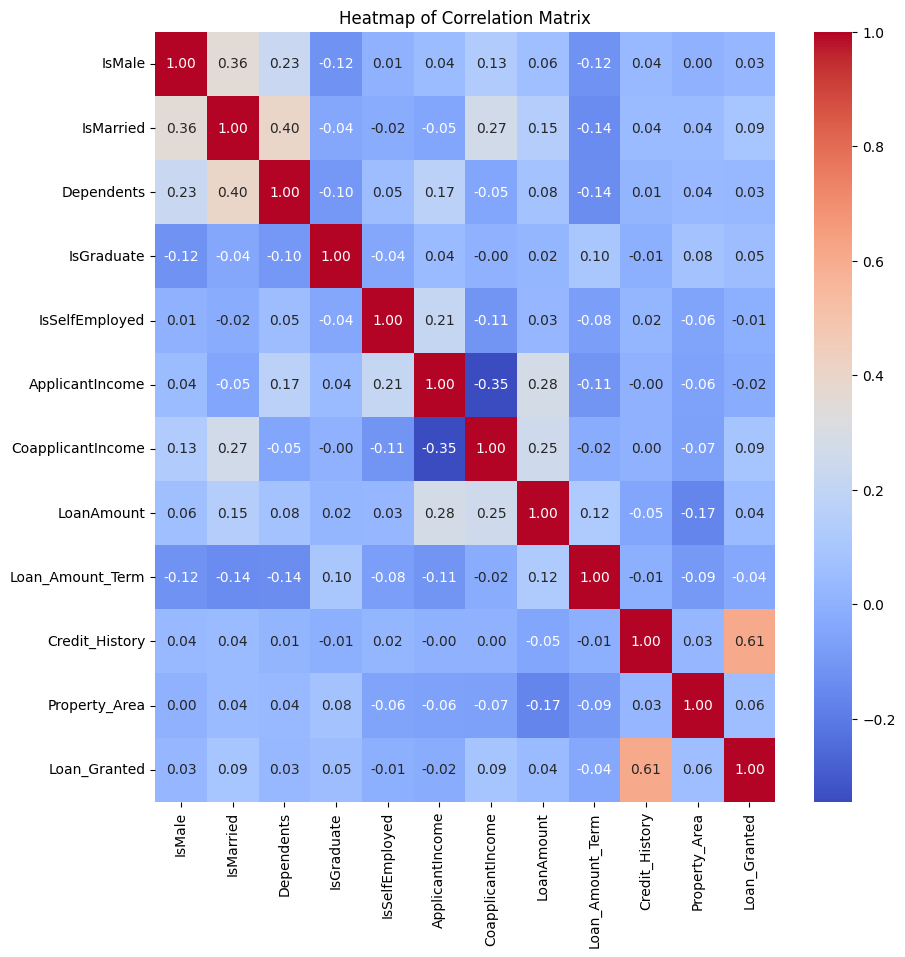

In [27]:
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df[df.columns[1:]].corr()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Create the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

# Set the title
ax.set_title('Heatmap of Correlation Matrix')

plt.show()

Applicant income and coapplicant income are **<span style="color:blue">strongly negatively</span>** correlated according to this. If we didn't check the case of the non-0 incomes, we'd be mislead that this is actually the case. We again see the loan amount and income correlations.<br>
We see that loan grants mostly depend on **credit history**.

What's also very interesting is that credit history is independent from applicant/coapplicant income. This can be again surprising, as you'd think that the more income you have, the more likely you are to have a good credit history.<br>
There are some other interesting correlations, like males having a higher coapplicant income, or that more people depend on them on average.

Because being self employed is not correlated with the target, and is quite correlated with applicant income, we'll drop it for training.

In [29]:
df = df.drop(columns=['IsSelfEmployed'])

## Reset the variables (for the next parts)

In [74]:
y = df['Loan_Granted'].values
X = df.iloc[:, 1:-1].values
X_normalized = (df_completed.iloc[:, 1:-1].values)

# Solution 2: Train a decision tree

Before we start, let's again write a function that basically runs models for us (we input the classifier and its parameters too) many times and averages the evaluation records. Less redundant code again.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

def run_evaluate_models(X, y, clf, test_size=0.3, parameters_dict={'max_depth':3}, n=100, quiet=False): #Could have also used **kwargs, but this works now
    train_accuracies = []; test_accuracies = []
    train_precisions = []; test_precisions = []
    train_recalls = []; test_recalls = []
    train_roc_aucs = []; test_roc_aucs = []
    
    for i in range(n):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=test_size) #I just included this in the func to have some randomness
        model = clf(**parameters_dict) #Basically just takes the parameters we give it as inputs
        model.fit(Xtrain, ytrain)
        ypred = model.predict(Xtrain)
        train_accuracies.append(accuracy_score(ytrain, ypred)); train_precisions.append(precision_score(ytrain, ypred))
        train_recalls.append(recall_score(ytrain, ypred)); train_roc_aucs.append(roc_auc_score(ytrain, ypred))
        ypred = model.predict(Xtest)
        test_accuracies.append(accuracy_score(ytest, ypred)); test_precisions.append(precision_score(ytest, ypred))
        test_recalls.append(recall_score(ytest, ypred)); test_roc_aucs.append(roc_auc_score(ytest, ypred))
    
    if not quiet: #Would be annoying 
        print(clf.__name__ + " with parameters: " + str(parameters_dict)+"\n")#Same as in solution 1, print function's name 
        print(f"Train accuracy: {np.mean(train_accuracies):.2f}")
        print(f"Test accuracy: {np.mean(test_accuracies):.2f}")
        print(f"Train precision: {np.mean(train_precisions):.2f}")
        print(f"Test precision: {np.mean(test_precisions):.2f}")
        print(f"Train recall: {np.mean(train_recalls):.2f}")
        print(f"Test recall: {np.mean(test_recalls):.2f}")
        print(f"Train ROC AUC: {np.mean(train_roc_aucs):.2f}")
        print(f"Test ROC AUC: {np.mean(test_roc_aucs):.2f}")
    else:
        return [np.mean(train_accuracies), np.mean(test_accuracies), np.mean(train_precisions), np.mean(test_precisions), np.mean(train_recalls), np.mean(test_recalls), np.mean(train_roc_aucs), np.mean(test_roc_aucs)]

def plot_evaluations(results, x_axis_iterable, x_axis_name):
    train_accuracies = [result[0] for result in results]; test_accuracies = [result[1] for result in results]
    train_precisions = [result[2] for result in results]; test_precisions = [result[3] for result in results]
    train_recalls = [result[4] for result in results]; test_recalls = [result[5] for result in results]
    train_roc_aucs = [result[6] for result in results]; test_roc_aucs = [result[7] for result in results]
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12)) 
    
    axes[0, 0].plot(x_axis_iterable, train_accuracies, label='Train accuracy')
    axes[0, 0].plot(x_axis_iterable, test_accuracies, label='Test accuracy')
    axes[0, 0].set_title('Accuracies')
    axes[0, 0].legend()
    
    axes[0, 1].plot(x_axis_iterable, train_precisions, label='Train precision')
    axes[0, 1].plot(x_axis_iterable, test_precisions, label='Test precision')
    axes[0, 1].set_title('Precisions')
    axes[0, 1].legend()
    
    axes[1, 0].plot(x_axis_iterable, train_recalls, label='Train recall')
    axes[1, 0].plot(x_axis_iterable, test_recalls, label='Test recall')
    axes[1, 0].set_title('Recalls')
    axes[1, 0].legend()
    
    axes[1, 1].plot(x_axis_iterable, train_roc_aucs, label='Train ROC AUC')
    axes[1, 1].plot(x_axis_iterable, test_roc_aucs, label='Test ROC AUC')
    axes[1, 1].set_title('ROC areas under curve')
    axes[1, 1].legend()
    
    fig.suptitle('Metrics for different {x_axis_name} (x axis)', fontsize=18, y = 1.01)
    plt.tight_layout()
    plt.show()

Let's try first: depth 4

In [44]:
run_evaluate_models(X, y, DecisionTreeClassifier, parameters_dict={'max_depth':4})

DecisionTreeClassifier with parameters: {'max_depth': 4}

Train accuracy: 0.87
Test accuracy: 0.82
Train precision: 0.86
Test precision: 0.82
Train recall: 0.99
Test recall: 0.95
Train ROC AUC: 0.79
Test ROC AUC: 0.72


We consistently see that the test accuracy is lower than the training accuracy, which is as expected. The difference doesn't seem big, overfitting is small here.

Let's try different train-test split ratios:

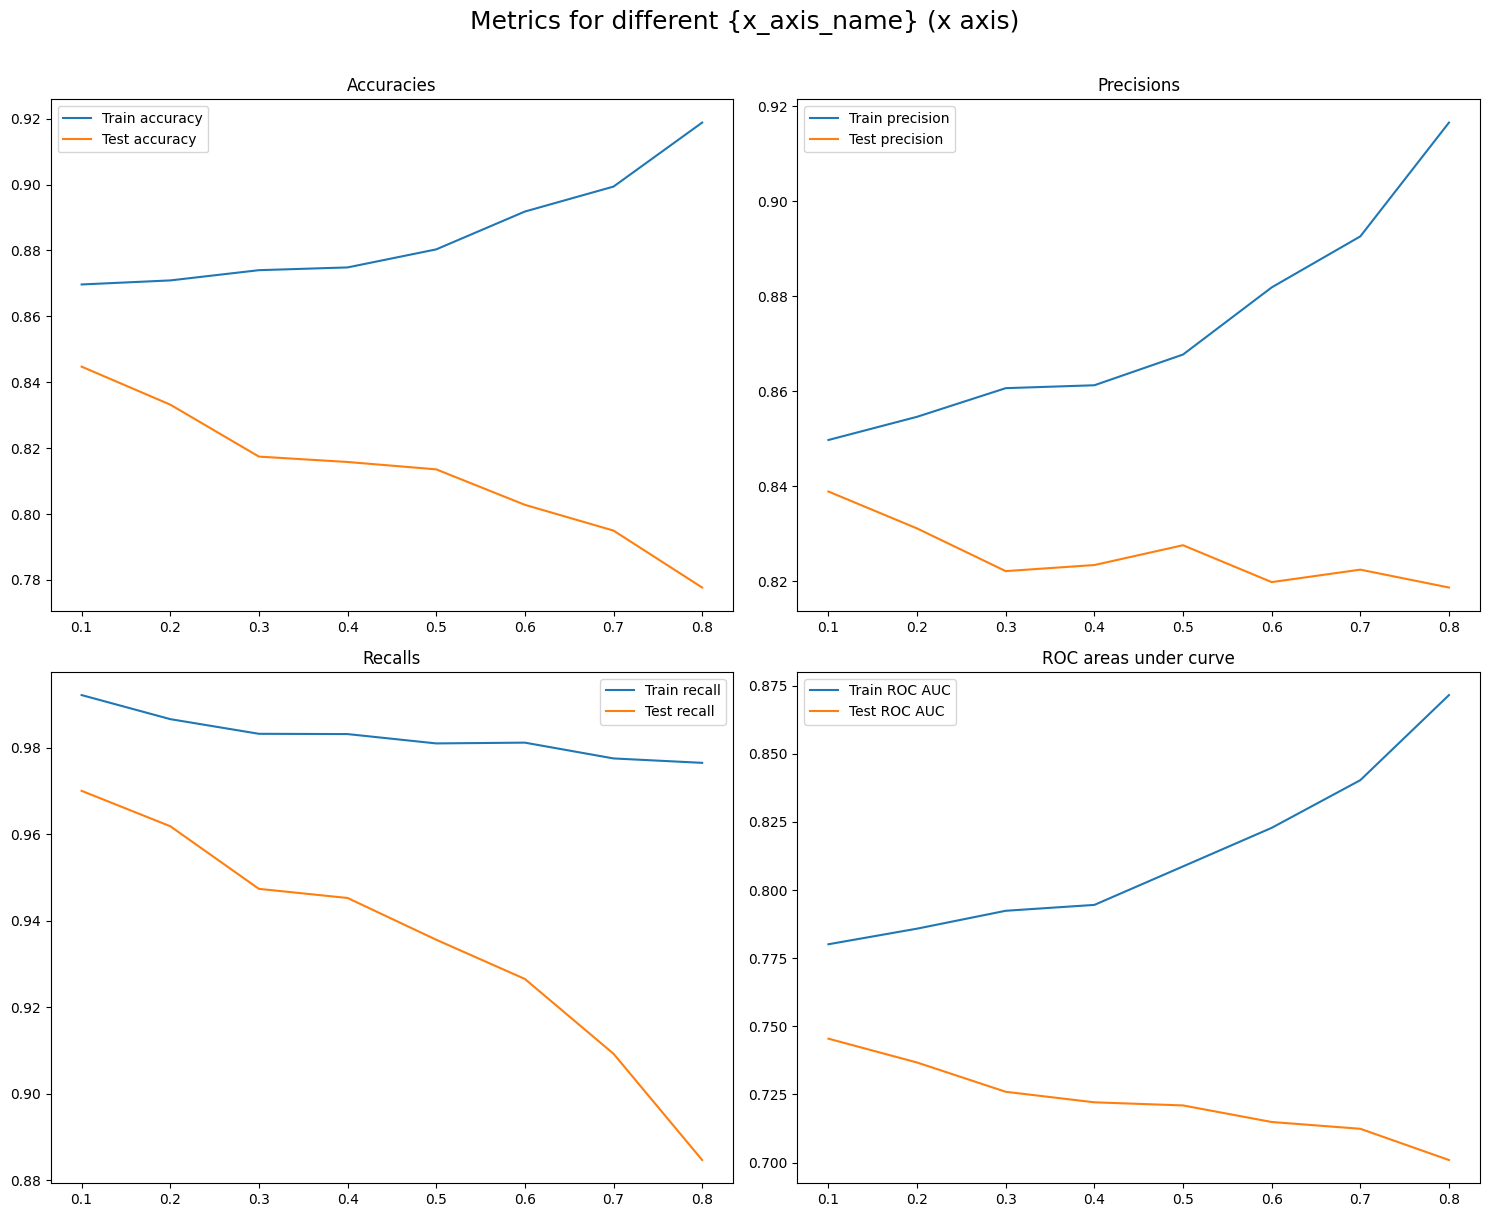

In [60]:
results = []
for i in np.arange(0.1, 0.9, 0.1):
    metrics =run_evaluate_models(X, y, DecisionTreeClassifier,test_size=i, parameters_dict={'max_depth':4}, quiet=True)
    results.append(metrics)

plot_evaluations(results, np.arange(0.1, 0.9, 0.1), 'test sizes')


Basically, the bigger your test set is, the smaller our training is, which in this case can decrease accuracy on the test set. On the training set, there are less cases, "easier" to predict them, so training accuracy is higher but test accuracy is lower. This is consistent with common sense. 

Let's try different depths, and see how the accuracy changes:

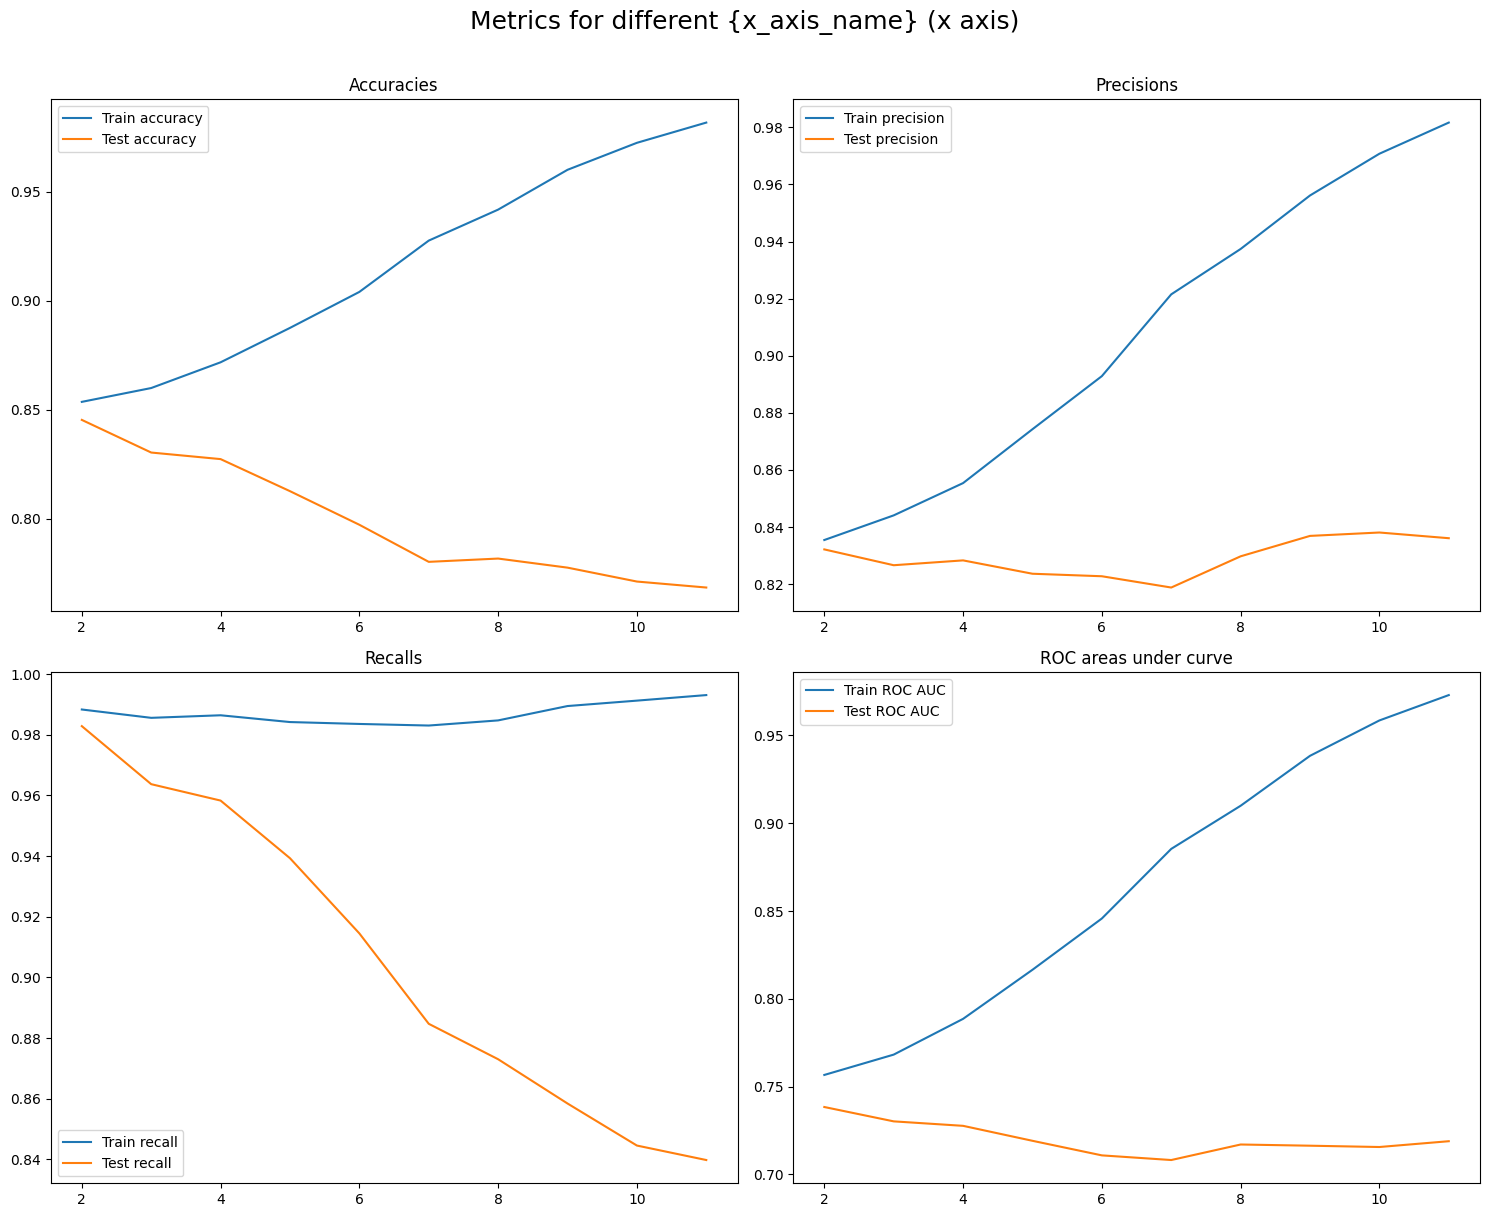

In [61]:
results = []
for i in range(2, 12):
    metrics =run_evaluate_models(X, y, DecisionTreeClassifier, parameters_dict={'max_depth':i}, quiet=True)
    results.append(metrics)

plot_evaluations(results, range(2, 12), 'max depths')

We see that even though with increasing depth of the tree (more things taken into consideration when predicting), the accuracy on the test set decreases. Of course, it increases on the training set. This is consistent with the idea of overfitting: too complicated models focus too much on the training set, and don't do well on new data.

# Solution 3

Because of the cross-validation, we don't need a test set anymore. But because this is a k-NN and it is distance-based, we need to use the normalized data again.

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)
#knn.fit(X, y)
cv_scores = cross_val_score(knn, X_normalized, y, cv=5)
print(np.mean(cv_scores)) #This doesn't change for other runs, we have no randomization

0.9573333333333334


The k-NN classifier is considerably better than the decision tree. Likely because many of the attributes are binary, so similar items do not fall that far from each other (they have the 0 distance for some attributes, that are equal), they'd come in clusters I believe if visualized in the feature dimension so a k-NN would really find fitting neighbors.

In [82]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
cv_scores = cross_val_score(nb, X_normalized, y, cv=5)
print(np.mean(cv_scores))

1.0


Wow, the cross-validation came out to be perfect on the normalized set! That's surprising. I tried other values for cross-validation, and even  I'd say that this is because again, the binary attributes, the feature space is not very big because of the 2-3 class attributes. We don't have sparse data because of this, especially in that feature space where the features really have an impact on the outcome (probably few models). The classifier can effectively choose which classes make a change in the result, and it is a model not prone to overfitting, which here makes it perfect.

In [109]:
nb = GaussianNB()
cv_scores = cross_val_score(nb, X, y, cv=5)
print(np.mean(cv_scores))

0.8453333333333333


It is interesting to see that on the not normalized data, it is only 85% accurate. That doesn't make sense to me, the normalization shouldn't change the result. I'm also thinking somehow information leaked into the prediction, but we didn't use the target variable for normalization, so I don't know how that could happen.

# Solution 4

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scalers = [MinMaxScaler(), StandardScaler(), RobustScaler()]
parameter_grid_tree = {'max_depth': range(2, 8),
                'min_samples_split': [2, 3, 5, 10],
                'min_samples_leaf': [1, 2, 5, 10, 20, 40]
                  }
parameter_grid_knn = {'n_neighbors': range(1, 8)}
parameter_grid_nb = {'var_smoothing': [1e-9, 1e-5, 1e-3]} #For avoiding 0 probabilities, we add a small number

results = []
for scaler in scalers:
    X_scaled = scaler.fit_transform(X)
    grid_search = GridSearchCV(DecisionTreeClassifier(), parameter_grid_tree, cv=5, scoring='accuracy')
    grid_search.fit(X_scaled, y)
    results.append(grid_search.best_score_)
    print("Decision tree with", scaler.__class__.__name__, ":", grid_search.best_score_)
    print("Best parameters:", grid_search.best_params_)

print("Best scaler for decision tree:", scalers[np.argmax(results)].__class__.__name__)
print("Accuracy with best parameters:", results[np.argmax(results)], "\n")

results = []
for scaler in scalers:
    X_scaled = scaler.fit_transform(X)
    grid_search = GridSearchCV(KNeighborsClassifier(), parameter_grid_knn, cv=5, scoring='accuracy')
    grid_search.fit(X_scaled, y)
    results.append(grid_search.best_score_)
    print("KNN with", scaler.__class__.__name__, ":", grid_search.best_score_)
    print("Best parameters:", grid_search.best_params_)

print("Best scaler for KNN:", scalers[np.argmax(results)].__class__.__name__)
print("Accuracy with best parameters:", results[np.argmax(results)], "\n")

results = []
for scaler in scalers:
    X_scaled = scaler.fit_transform(X)
    grid_search = GridSearchCV(GaussianNB(), parameter_grid_nb, cv=5, scoring='accuracy')
    grid_search.fit(X_scaled, y)
    results.append(grid_search.best_score_)
    print("Naive Bayes with", scaler.__class__.__name__, ":", grid_search.best_score_)
    print("Best parameters:", grid_search.best_params_)

print("Best scaler for Naive Bayes:", scalers[np.argmax(results)].__class__.__name__)
print("Accuracy with best parameters:", results[np.argmax(results)], "\n")


Decision tree with MinMaxScaler : 0.8506666666666668
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision tree with StandardScaler : 0.8506666666666668
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision tree with RobustScaler : 0.8506666666666668
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best scaler for decision tree: MinMaxScaler
Accuracy with best parameters: 0.8506666666666668 

KNN with MinMaxScaler : 0.8373333333333333
Best parameters: {'n_neighbors': 5}
KNN with StandardScaler : 0.8373333333333333
Best parameters: {'n_neighbors': 7}
KNN with RobustScaler : 0.792
Best parameters: {'n_neighbors': 3}
Best scaler for KNN: MinMaxScaler
Accuracy with best parameters: 0.8373333333333333 

Naive Bayes with MinMaxScaler : 0.8453333333333333
Best parameters: {'var_smoothing': 1e-09}
Naive Bayes with StandardScaler : 0.8453333333333333
Best parameters: {'var_smoothing': 1e-09}


The scaler did not change anything for the tree, which makes sense as it is not distance-based. For the k-NN, the MinMaxScaler and standard scaler were the best, robust scaling did considerably poorly, it is also interesting that the number of neighbors in best case was different for each case. For the NBC, there seem no differences again, which is expected, as it is not distance-based.

With the best hyperparameters and scalers, the decision tree does best, but not by much. The k-NN had better results on our z-score normalized data however, with 95% (which is "debatable", as somehow that set also improves the Naive Bayes' accuracy).

# Solution 5

Let's see which model would be the best for the business context:

Accuracy: The Naive Bayes somehow maxed accuracy with normalized data, which is surprising as nothing should change when normalizing, so there may have been a mistake. The hyperparameter tuned and scaled models had similar cross validation scores at around 83-85%, which likely means they are accurate and inaccurate on similar instances. The decision tree had the best CV-score, but not by much, and it is not distance-based, so scaling cannot have an effect on it.

Time is often a component of choice in business, by time I mean the time it takes to make a prediction (this could be important if you make many predictions fast, in real-time systems). k-NNs are relatively slow, because they take at least *n* iterations (distance computing) to make a prediction (O(n)), trees I believe take constant time (depth of the tree) which is much faster. However, we only have ~300 samples, so prediction would be so far fast, plus this is for decision making on loans which can take time, doesn't have to be quick. This should not be a factor in this case.

Possible other factors: Interpretability: Decision trees are very interpretable, you can see the rules that the model uses to make a decision. k-NNs are a bit vague, they just make a prediction based on the closest people in the feature space. Naive Bayes is also interpretable, as it is based on probabilities, but the probabilities are based on overall statistics which are not very interpretable.<br>
Because this is for a loan approval (likely), I would say interpretability is important. You have to tell the customer why you rejected their loan, and with the latter two models you can't put it into words very easily. This is why I would choose the decision tree. 